# CS 2810 HW 5: Programming (26 points)

Due alongside written hw5, see written hw 5 for due date information.

### Submission Instructions
The assignment may include different types of responses.  Response types are indicated next to each part.  (e.g. `Part A (W: 12 points)` means part A requires a written response and is worth 12 points.  Grading penalties will be assessed if submissions do not follow the following instructions:

#### Written Submission (W)

- submit at the end of the written portion of HW
- order responses as given here (e.g. part A before part B)
- label each written response with its associated part (e.g. write 'Part A' above the associated repsonse)

#### Programming Submission (P)

- submit a `.py` file, not a `.ipynb`, of this notebook with your responses (`file` -> `download as...` -> `python .py`)
- label the file `hwxx_<firstname>_<lastname>.py` (e.g. `hw01_carl_gauss.py`)
- use identical naming of variables and functions as defined here

#### Programming & Screenshot Submission (PS)
Full credit requires both a programming submission as well as a screen shot.  In addition to following the programming submission guidelines above ...

- submit one image file per PS
- label the file `part_a.jpg` or similar
- crop the image to include only the relevant area

### Academic Integrity

Under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.


# Minimizing F: a single-variable function

$$f = \frac{1}{4}x^4 + \frac{1}{3}x^3 - 3x^2 $$

### Part A: (W 2 point)
Using calculus, find all $x$ which produce either a minimum or maximum (i.e. extremum) of $f$.  You do not need to tell which points are minima and which are maxima.  Write your answer along with the written portion of your hw.

### Solution: Part A
We take the derivative and set it to zero to find all extrema (plural of extremum) of $f$:

$$ \frac{df}{dx} = x^3 + x^2 - 6x = 0 \implies x(x + 3) (x - 2) = 0$$

So that $x = 0$, $x = -3$ and $x = +2$ are extrema of $f$.

### Part B: (P 2 points)
Complete the functions which evaluate $f$ and $\frac{df}{dx}$ below.

In [2]:
# Solution B:

def f(x):
    """ evaluates f at point x
    
    Args:
        x (float): point in domain of x
        
    Returns:
        f (float): f evaluated @ x
    """
    return x ** 4 / 4 + x ** 3 / 3 - 3 * x**2

def df_dx(x):
    """ returns derivative of f at point x
    
    Args:
        x (float): points in domain of x
        
    Returns:
        df (float): derivative of f @ x
    """
    return x**3 + x**2 - 6 * x
    


### Part C:  (P 2 points)
Plot $f$ and $\frac{df}{dx}$ by building a vector `x` of `100` equally spaced points from `-4` to `4` (see `numpy.linspace`).  Then apply the `f()` and `df_dx()` from above to each point in this domain and plot the result using `matplotlib.plot`.  Label your plots so that we may distinguish the two functions by using `matplotlib.legend()`.  

Take a screen shot of your graph and submit it as `part_c.jpg`.

Hints:
 - validate your plots by ensuring that your extreme points in part A have consistent values of each $f$ and $\frac{df}{dx}$
 - Struggling to put a legend on your graph?  Mimick the ['simple plot' shown here](https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#matplotlib-pyplot-and-pylab-how-are-they-related) of how `matplotlib` passes `label='your label here'` parameter to the calls of `plt.plot()`.  Finally, activate the legend itself by giving one final call to `plt.legend()`.


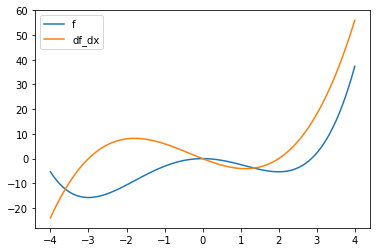

In [3]:
# Solution C
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 100)

plt.plot(x, f(x), label='f')
plt.plot(x, df_dx(x), label='df_dx')
plt.legend();

### Part D (P 2 points)
Write a function which takes a single gradient descent step in the positive $x$ direction.  A stub is given below:  

In [4]:
# Solution D
def grad_descent_step_1d(x, learn_rate):
    """ take a single hill climbing step on f
    
    Args:
        x (float): position in domain of f, where step begins
        learn_rate (float): scales how big step to take (larger
            values take bigger steps)
        
    Returns:
        x_out (float): position in domain of f, where step ends
    """
    return x - df_dx(x) * learn_rate

### Part E (PS 4 points)
Starting at position $x=.1$, write a loop which takes 4 gradient steps towards the minimum of $f$ with a `learn_rate=.2`.  Make a plot which demonstrates your results.  This new figure should include:

- a line of $f$ between $x=-4$ and $x=4$ (feel free to copy the code for the graph you built in part C) 
- a scatter point at each of the 5 points $(x, f(x))$ before and after gradient descent steps.

`print()` $(x, f(x))$ to the command line for each of the 5 points in the order they are visited.

Remember that `matplotlib.scatter(x, y)` will plot a point at $(x, y)$.  You may find it helpful to return to the python tutorial to refresh yourself on python's loop syntax.

step_idx 0: (0.10, -0.03)
step_idx 1: (0.22, -0.14)
step_idx 2: (0.47, -0.61)
step_idx 3: (0.96, -2.28)
step_idx 4: (1.76, -5.07)


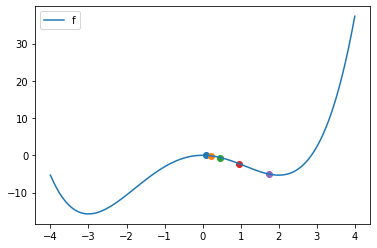

In [5]:
plt.plot(x, f(x), label='f')
plt.legend()

x = .1

# print and plot initial point
print(f'step_idx 0: ({x:.2f}, {f(x):.2f})')
plt.scatter(x, f(x))

for step_idx in range(4):
    # take gradient descent step
    x = grad_descent_step_1d(x, .2)
    
    # print and plot new point
    print(f'step_idx {step_idx + 1}: ({x:.2f}, {f(x):.2f})')
    plt.scatter(x, f(x))

### Part F (W 2 points)
Has gradient descent found a local or a global minimum of $f$?  If the search only found a local minimum, how might you change the variables above to find the global minimum?  (Test out your ideas by changing the necessary variables and re-running above).

### Solution: Part F

Gradient descent does not reach the global minimum of $f$.  It is headed towards $x=2$ which is only a local minimum.  If the initial point was less than 0 (such as $x=-.1$) than gradient descent would head towards $x=-3$, the global minimum.

# Minimizing G: a multivariate function
Lets turn our attention to a function of two variables:

$$ g(\begin{bmatrix} x_0 \\ x_1 \end{bmatrix}) = (2 - x_0)^2 + (3 - x_1)^2$$

which we can visualize via a contour plot.  The contour lines are labelled with all the points which have the same value of $g$.  For example, the inner most ellipse labels all points with $g=3$.  Hikers may recognize this as a close cousin of a [topographic map](https://en.wikipedia.org/wiki/Topographic_map#/media/File:Topographic_map_example.png).

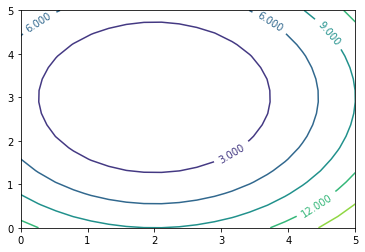

In [6]:
x0 = np.linspace(0, 5, 20)
x1 = np.linspace(0, 5, 20)

def plot_g_contour(x0, x1):
    X0, X1 = np.meshgrid(x0, x1)
    G =  (2 - X0) ** 2 + (3 - X1) ** 2
    cs = plt.contour(X0, X1, G, levels=6)
    plt.gca().clabel(cs, inline=1, fontsize=10)
    
plot_g_contour(x0, x1)

### Part G (P 4 points)
Write functions which evaluate $g$ and $\nabla g$.  Pay attention to the dimensions of the inputs / outputs given in the stubs.

In [7]:
# solution G
def g(x):
    """ evaluates g at point x
    
    Args:
        x (np.array): a 2d point in domain of g
        
    Returns:
        g (float): evaluation of g
    """
    return (2 - x[0]) ** 2 + (3 - x[1]) ** 2

def del_g(x):
    """ returns gradient of f at point x
    
    Args:
        x (np.array): 2d point in domain of g
        
    Returns:
        del_g (np.array): gradient of g at point x (a 2d vector)
    """
    return np.array([-2*(2 - x[0]), 
                     -2*(3 - x[1])])
    


### Part H (P 2 points)
Write a function which takes a single gradient descent step in $x$ in the 2d case.  A stub is given below:  

In [8]:
def grad_descent_step_2d(x, learn_rate):
    """ take a single hill climbing step on g
    
    Args:
        x (np.array): position in domain of g, where step begins (2d vector)
        learn_rate (float): scales how big step to take
        
    Returns:
        x_out (np.array): position in domain of g, where step ends
    """
    return x - del_g(x) * learn_rate

### Part G (PS 6 points)
Starting at position $(1, 1)$, write a loop which takes 4 gradient steps towards the minimum of $g$ with a `learn_rate=.2`.  Make a plot which demonstrates your results.  This new figure should include:

- a contour of $g$ (re-use the `plot_g_contour(x0, x1)` given)
- a scatter point at each of the 5 $(x_0, x_1)$ points before and after gradient descent steps.  `matplotlib.scatter(x[0], x[1])` will plot a point at $(x_0, x_1)$

To keep track of the order the points are visited in, be sure to `print(x)` and `print(g(x))` to the command line for each of the 5 points.

[1 1]
5
-------
[1.4 1.8]
1.8
-------
[1.64 2.28]
0.6479999999999997
-------
[1.784 2.568]
0.23327999999999993
-------
[1.8704 2.7408]
0.08398079999999991


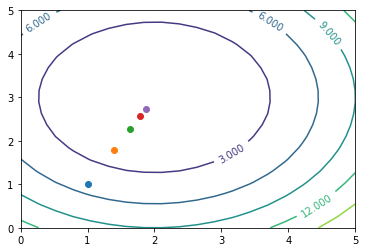

In [9]:
# Solution G
plot_g_contour(x0, x1)

# initial point
x = np.array([1, 1])

# print and plot initial point
print(x)
print(g(x))
plt.scatter(x[0], x[1])

for step_idx in range(4):
    # take gradient descent step
    x = grad_descent_step_2d(x, .2)
    
    # print and plot new point
    print('-------')
    print(x)
    print(g(x))
    plt.scatter(x[0], x[1])